In [ ]:
import numpy as np


class SGD:
    """확률적 경사 하강법（Stochastic Gradient Descent）"""
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.Keys():
            params[key] -= self.lr * grads[key]

In [ ]:
class Momentum:
    """모멘텀 SGD"""
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key] # 속도 누적
            params[key] += self.v[key]

In [ ]:
class AdaGrad:
    """AdaGrad"""
    def __init(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [ ]:
class Nesterov:

    """Nesterov's Accelerated Gradient (http://arxiv.org/abs/1212.0901)"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            # 기존 속도에 모멘텀을 곱해 반영
            self.v[key] *= self.momentum
            # 새로운 기울기(gradient)를 반영 (여기까진 기존 모멘텀)
            self.v[key] -= self.lr * grads[key]
            # 파라미터 업데이트: 모멘텀 제곱항 반영
            params[key] += self.momentum * self.momentum * self.v[key]
            # 파라미터 업데이트: 기울기 항과 모멘텀 계수 반영
            params[key] -= (1 + self.momentum) * self.lr * grads[key]

In [ ]:
class RMSprop:

    """RMSprop"""

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] *= self.decay_rate # 과거의 기울기를 서서히 줄이는 역할
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

# 6.2 가중치의 초깃값

[8.04186404e-01 4.03038150e-03 4.84497010e-13 ... 1.08447585e-03
 4.90106676e-13 1.00000000e+00]
[9.99999994e-01 1.00000000e+00 1.00000000e+00 ... 9.87367022e-01
 1.67227607e-11 1.00000000e+00]
[5.09005741e-04 1.00000000e+00 1.24391511e-23 ... 9.46675208e-23
 9.73326508e-01 7.95904616e-08]
[1.03114119e-03 9.99998913e-01 1.00000000e+00 ... 1.00000000e+00
 1.19454028e-09 4.03566151e-15]
[1.79418350e-03 1.00000000e+00 1.67909585e-04 ... 1.00000000e+00
 2.11352364e-02 9.99982751e-01]


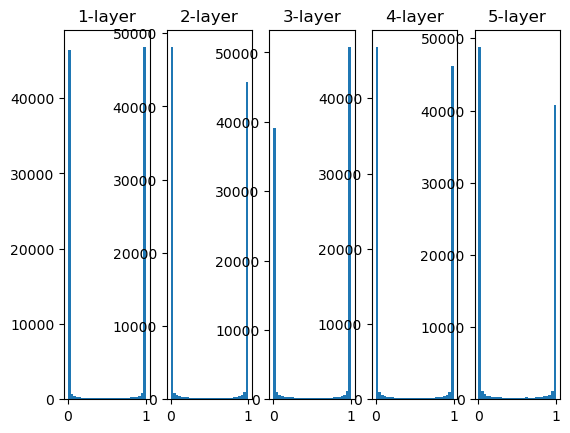

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 활성화 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # 입력 x를 시그모이드 함수로 변환

# 입력 데이터 생성
x = np.random.randn(1000, 100)  # 1000개의 데이터, 각 데이터는 100차원 벡터
node_num = 100                  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5           # 은닉층의 수 (총 5개의 은닉층)
activations = {}                # 활성화값을 저장할 딕셔너리

# 은닉층을 순차적으로 처리
for i in range(hidden_layer_size):  # 각 은닉층에 대해 반복
    if i != 0:
        x = activations[i-1]  # 첫 층이 아니면 이전 층의 활성화값을 입력으로 사용

    # 가중치 초기화: 평균 0, 표준편차 1인 정규분포로 가중치 생성
    w = np.random.randn(node_num, node_num) * 4

    # 전파 단계: 입력 x와 가중치 w를 점곱하여 출력값 a 계산
    a = np.dot(x, w)  # 은닉층의 가중합 계산 (가중치 적용)

    # 활성화 함수 적용: 시그모이드 함수로 활성화값 z 계산
    z = sigmoid(a)  # 가중합 a에 시그모이드 함수 적용


    # 활성화값 저장: 현재 층의 활성화값을 딕셔너리에 저장
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():  # 각 층의 활성화값을 반복하면서 히스토그램 생성
    print(a.flatten())
    plt.subplot(1, len(activations), i + 1)  # 1행, N열의 서브플롯 설정
    plt.title(f'{i+1}-layer')  # 각 서브플롯의 제목 설정
    plt.hist(a.flatten(), 30, range=(0, 1))  # 활성화값의 히스토그램 (0~1 범위, 30개의 구간)

# 그래프 표시
plt.show()

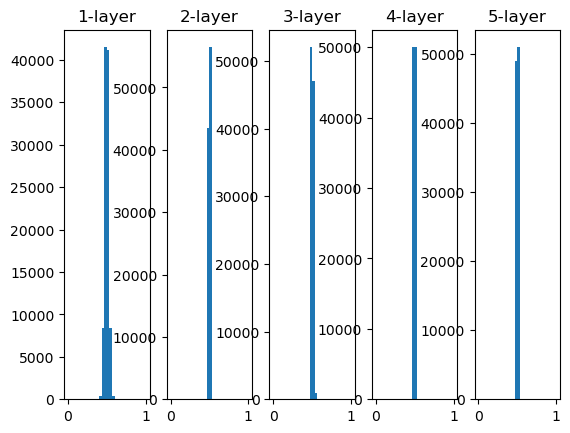

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 활성화 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # 입력 x를 시그모이드 함수로 변환

# 입력 데이터 생성
x = np.random.randn(1000, 100)  # 1000개의 데이터, 각 데이터는 100차원 벡터
node_num = 100                  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5           # 은닉층의 수 (총 5개의 은닉층)
activations = {}                # 활성화값을 저장할 딕셔너리

# 은닉층을 순차적으로 처리
for i in range(hidden_layer_size):  # 각 은닉층에 대해 반복
    if i != 0:
        x = activations[i-1]  # 첫 층이 아니면 이전 층의 활성화값을 입력으로 사용

    # 가중치 초기화: 평균 0, 표준편차 0.01인 정규분포로 가중치 생성
    w = np.random.randn(node_num, node_num) * 0.01

    # 전파 단계: 입력 x와 가중치 w를 점곱하여 출력값 a 계산
    a = np.dot(x, w)  # 은닉층의 가중합 계산 (가중치 적용)

    # 활성화 함수 적용: 시그모이드 함수로 활성화값 z 계산
    z = sigmoid(a)  # 가중합 a에 시그모이드 함수 적용

    # 활성화값 저장: 현재 층의 활성화값을 딕셔너리에 저장
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():  # 각 층의 활성화값을 반복하면서 히스토그램 생성
    plt.subplot(1, len(activations), i + 1)  # 1행, N열의 서브플롯 설정
    plt.title(f'{i+1}-layer')  # 각 서브플롯의 제목 설정
    plt.hist(a.flatten(), 30, range=(0, 1))  # 활성화값의 히스토그램 (0~1 범위, 30개의 구간)

# 그래프 표시
plt.show()

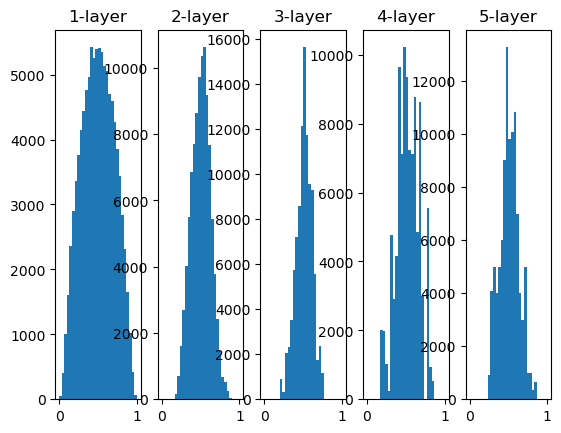

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 활성화 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # 입력 x를 시그모이드 함수로 변환

def tanh(x):
    p_exp_x = np.exp(x)
    m_exp_x = np.exp(-x)
    return np.tanh(x)
    return (p_exp_x -m_exp_x) / (p_exp_x + m_exp_x)

def relu(x):
    return np.maximum(0, x)
# 입력 데이터 생성
x = np.random.randn(1000, 100)  # 1000개의 데이터, 각 데이터는 100차원 벡터
node_num = 100                  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5           # 은닉층의 수 (총 5개의 은닉층)
activations = {}                # 활성화값을 저장할 딕셔너리

# 은닉층을 순차적으로 처리
for i in range(hidden_layer_size):  # 각 은닉층에 대해 반복
    if i != 0:
        x = activations[i-1]  # 첫 층이 아니면 이전 층의 활성화값을 입력으로 사용

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)

    # 전파 단계: 입력 x와 가중치 w를 점곱하여 출력값 a 계산
    a = np.dot(x, w)  # 은닉층의 가중합 계산 (가중치 적용)

    # 활성화 함수 적용: 시그모이드 함수로 활성화값 z 계산
    z = sigmoid(a)  # 가중합 a에 시그모이드 함수 적용

    # 활성화값 저장: 현재 층의 활성화값을 딕셔너리에 저장
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():  # 각 층의 활성화값을 반복하면서 히스토그램 생성
    plt.subplot(1, len(activations), i + 1)  # 1행, N열의 서브플롯 설정
    plt.title(f'{i+1}-layer')  # 각 서브플롯의 제목 설정
    plt.hist(a.flatten(), 30, range=(0, 1))  # 활성화값의 히스토그램 (0~1 범위, 30개의 구간)

# 그래프 표시
plt.show()

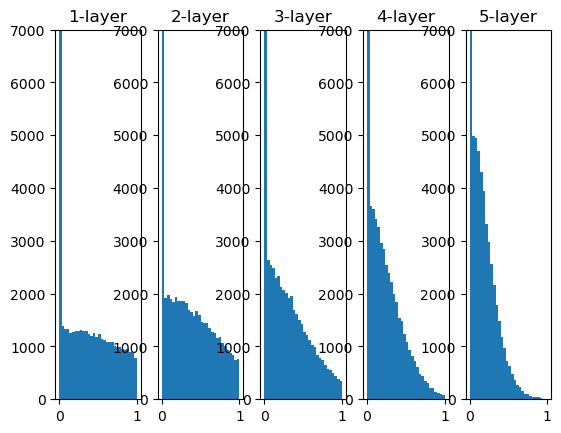

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 활성화 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # 입력 x를 시그모이드 함수로 변환

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)
# 입력 데이터 생성
x = np.random.randn(1000, 100)  # 1000개의 데이터, 각 데이터는 100차원 벡터
node_num = 100                  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5           # 은닉층의 수 (총 5개의 은닉층)
activations = {}                # 활성화값을 저장할 딕셔너리

# 은닉층을 순차적으로 처리
for i in range(hidden_layer_size):  # 각 은닉층에 대해 반복
    if i != 0:
        x = activations[i-1]  # 첫 층이 아니면 이전 층의 활성화값을 입력으로 사용

    #w = np.random.randn(node_num, node_num) * 1
    #w = np.random.randn(node_num, node_num) * 0.01
    #w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    w = np.random.randn(node_num, node_num) /  np.sqrt(node_num)

    # 전파 단계: 입력 x와 가중치 w를 점곱하여 출력값 a 계산
    a = np.dot(x, w)  # 은닉층의 가중합 계산 (가중치 적용)

    # 활성화 함수 적용: 시그모이드 함수로 활성화값 z 계산
    z = relu(a)  # 가중합 a에 시그모이드 함수 적용

    # 활성화값 저장: 현재 층의 활성화값을 딕셔너리에 저장
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():  # 각 층의 활성화값을 반복하면서 히스토그램 생성
    plt.subplot(1, len(activations), i + 1)  # 1행, N열의 서브플롯 설정
    plt.title(f'{i+1}-layer')  # 각 서브플롯의 제목 설정
    plt.ylim(0, 7000)  # y축의 최대값을 7000으로 설정
    plt.yticks(np.arange(0, 7001, 1000))  # y축 눈금을 1000 단위로 설
    plt.hist(a.flatten(), 30, range=(0, 1))  # 활성화값의 히스토그램 (0~1 범위, 30개의 구간)

# 그래프 표시
plt.show()

In [55]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # 입력 x를 시그모이드 함수로 변환

print(sigmoid(40))
print(sigmoid(-4000))

1.0
0.0


/var/folders/ks/g557dmv54qsd_xmq2wm8fhhm0000gn/T/ipykernel_98845/1207558671.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))  # 입력 x를 시그모이드 함수로 변환
